In [14]:
from __future__ import print_function
from __future__ import division
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv4 = nn.Conv2d(64, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.pool(x)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

def eval_net(dataloader):
    correct = 0
    total = 0
    total_loss = 0
    net.eval() # Why would I do this?
    criterion = nn.CrossEntropyLoss(size_average=False)
    for data in dataloader:
        images, labels = data
        images, labels = Variable(images).cuda(), Variable(labels).cuda()
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.data).sum()
        loss = criterion(outputs, labels)
        total_loss += loss.item()
    net.train() # Why would I do this?
    return total_loss / total, correct / total
record=[]
if __name__ == "__main__":
    BATCH_SIZE = 32 #mini_batch size
    MAX_EPOCH = 10 #maximum epoch to train

    transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) #torchvision.transforms.Normalize(mean, std)

#     trainset = torchvision.datasets.CIFAR10(root='./data1', train=True,
#                                             download=False, transform=transform)
#     trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
#                                               shuffle=True, num_workers=2)

#     testset = torchvision.datasets.CIFAR10(root='./data1', train=False,
#                                            download=False, transform=transform)
#     testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
#                                              shuffle=False, num_workers=2)
    train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=False)
    test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)
    classes = ('plane', 'car', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

    print('Building model...')
    net = Net().cuda()
    net.train() # Why would I do this?

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

    print('Start training...')
    for epoch in range(MAX_EPOCH):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data

            # wrap them in Variable
            inputs, labels = Variable(inputs).cuda(), Variable(labels).cuda()

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            # print statistics
            running_loss += loss.item()
            if i % 500 == 499:    # print every 2000 mini-batches
                print('    Step: %5d avg_batch_loss: %.5f' %
                      (i + 1, running_loss / 500))
                running_loss = 0.0
        record.append(running_loss)
        print('    Finish training this EPOCH, start evaluating...')
        train_loss, train_acc = eval_net(trainloader)
        test_loss, test_acc = eval_net(testloader)
        print('EPOCH: %d train_loss: %.5f train_acc: %.5f test_loss: %.5f test_acc %.5f' %
              (epoch+1, train_loss, train_acc, test_loss, test_acc))
    print('Finished Training')
    print('Saving model...')
    torch.save(net.state_dict(), 'mytraining.pth')


Building model...
Start training...
    Step:   500 avg_batch_loss: 1.98714
    Step:  1000 avg_batch_loss: 1.51554
    Step:  1500 avg_batch_loss: 1.31441
    Finish training this EPOCH, start evaluating...


/nfs/stak/users/wench/wen7/envs/myenv/lib/python3.6/site-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


EPOCH: 1 train_loss: 1.14053 train_acc: 0.00000 test_loss: 1.18563 test_acc 0.00000
    Step:   500 avg_batch_loss: 1.10480
    Step:  1000 avg_batch_loss: 1.01392
    Step:  1500 avg_batch_loss: 0.92773
    Finish training this EPOCH, start evaluating...
EPOCH: 2 train_loss: 0.81418 train_acc: 0.00000 test_loss: 0.93508 test_acc 0.00000
    Step:   500 avg_batch_loss: 0.79068
    Step:  1000 avg_batch_loss: 0.76190
    Step:  1500 avg_batch_loss: 0.72711
    Finish training this EPOCH, start evaluating...
EPOCH: 3 train_loss: 0.53140 train_acc: 0.00000 test_loss: 0.76596 test_acc 0.00000
    Step:   500 avg_batch_loss: 0.55610
    Step:  1000 avg_batch_loss: 0.58795
    Step:  1500 avg_batch_loss: 0.57542
    Finish training this EPOCH, start evaluating...
EPOCH: 4 train_loss: 0.40507 train_acc: 0.00000 test_loss: 0.82004 test_acc 0.00000
    Step:   500 avg_batch_loss: 0.38036
    Step:  1000 avg_batch_loss: 0.42591
    Step:  1500 avg_batch_loss: 0.42970
    Finish training this EPO

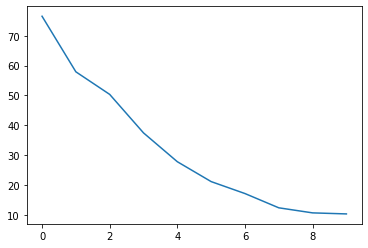

In [15]:
from matplotlib import pyplot as plt
plt.plot(record)

In [12]:
record

[74.56247758865356,
 55.182134330272675,
 43.35601627826691,
 33.93928015232086,
 28.758339375257492,
 19.709520868957043,
 17.703631311655045,
 13.053175784647465,
 8.684506446123123,
 11.484037190675735]